In [6]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I


In [7]:
# Dsiplay the data infor.
data = pd.read_csv('traffic.csv',encoding = 'ISO-8859-1')
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60168 entries, 0 to 60167
Data columns (total 28 columns):
date                     60168 non-null object
road_name                60168 non-null object
location                 60168 non-null object
suburb                   60168 non-null object
speed_limit              60168 non-null int64
direction                60168 non-null object
time                     60168 non-null object
vehicle_class_1          60056 non-null float64
vehicle_class_2          60056 non-null float64
vehicle_class_3          60056 non-null float64
vehicle_class_4          60056 non-null float64
vehicle_class_5          60056 non-null float64
vehicle_class_6          60056 non-null float64
vehicle_class_7          60056 non-null float64
vehicle_class_8          60056 non-null float64
vehicle_class_9          60056 non-null float64
vehicle_class_10         60056 non-null float64
vehicle_class_11         60056 non-null float64
vehicle_class_12         60056 non-

In [8]:
#Cleaning data
data.maximum_speed.sort_values(ascending=False)
    
# remove the null value row from the data frame.
temp = data[data.maximum_speed.notnull()]

# remove the \"-\" value row from the data frame.
traffic = temp[temp.maximum_speed != "-"]

print ("Number of remaning traffic survey entry is", len(traffic))

traffic.info(verbose=True)

Number of remaning traffic survey entry is 41510
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41510 entries, 4 to 49529
Data columns (total 28 columns):
date                     41510 non-null object
road_name                41510 non-null object
location                 41510 non-null object
suburb                   41510 non-null object
speed_limit              41510 non-null int64
direction                41510 non-null object
time                     41510 non-null object
vehicle_class_1          41510 non-null float64
vehicle_class_2          41510 non-null float64
vehicle_class_3          41510 non-null float64
vehicle_class_4          41510 non-null float64
vehicle_class_5          41510 non-null float64
vehicle_class_6          41510 non-null float64
vehicle_class_7          41510 non-null float64
vehicle_class_8          41510 non-null float64
vehicle_class_9          41510 non-null float64
vehicle_class_10         41510 non-null float64
vehicle_class_11         41510 non

In [9]:
# Format the data type

# Tranfer any "number" in string or int to float
traffic.vehicle_class_1 = traffic.vehicle_class_1.astype(float)

print ("Median value of vehicle_class_1:" , traffic.vehicle_class_1.median())


# transfer any "number" in string or int to float

traffic.maximum_speed = traffic.maximum_speed.astype(float)

print ("Highest value of maximum_speed:" , traffic.maximum_speed.max())


# for later dataset wrangling process.

traffic = traffic.reset_index()


Median value of vehicle_class_1: 28.0
Highest value of maximum_speed: 159.0


/Users/ethannicholas/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
import json

# read json file
with open('roads.json', 'r') as myfile:
    
    roads = myfile.read()

# parse file
roads_json = json.loads(roads)


# match the data type by converting to list

roads_data = pd.DataFrame.from_dict(roads_json['data'])

roads_data[9] = roads_data[9].astype(int)

StrType = list()

# remove the repetiton segment ID 
unique_id = pd.Series.unique(traffic.road_segment).tolist()

# Find the related StrType
for id in unique_id:
    for j in range(len(roads_data[9])):
        if id == roads_data[9][j]:
            StrType.append(roads_data[14][j])
            break
        else:
            pass

# construct a second dataframe to apply the merge function
df_data = {'road_segment' :unique_id , 'StrType' :StrType}

df_road = pd.DataFrame(df_data)

# merged the two dataframes base on the rode_segment
merged_traffic = pd.merge(traffic,df_road, on = 'road_segment')

print("The first three rows of traffic DataFrame with the attribute StrType are:")
print(merged_traffic.iloc[:3])


The first three rows of traffic DataFrame with the attribute StrType are:
   index       date      road_name  \
0      4  3/09/2015  Bayles Street   
1      5  3/09/2015  Bayles Street   
2      6  3/09/2015  Bayles Street   

                                     location     suburb  speed_limit  \
0  Between Fitzgibbon Street and Jageurs Lane  Parkville           40   
1  Between Fitzgibbon Street and Jageurs Lane  Parkville           40   
2  Between Fitzgibbon Street and Jageurs Lane  Parkville           40   

  direction   time  vehicle_class_1  vehicle_class_2  ...  vehicle_class_13  \
0         E  04:00              1.0              0.0  ...               0.0   
1         E  05:00              1.0              0.0  ...               0.0   
2         E  06:00              4.0              0.0  ...               0.0   

   motorcycle  bike  average_speed  85th_percentile_speed  maximum_speed  \
0         0.0   1.0           18.2                   18.0           18.0   
1         0

In [11]:
#convert the maximum_speed from string to int

merged_traffic.maximum_speed = merged_data.maximum_speed.astype(float)

#substracting 
max_speed_over_limit = pd.Series.subtract(merged_traffic.maximum_speed, merged_traffic.speed_limit, level=None, fill_value=None, axis=0)

# Assign to the new column to data frame
merged_traffic["max_speed_over_limit"] = max_speed_over_limit

print("The first three rows of traffic DataFrame with the new max_speed_over_limit attribute are:")
print(merged_traffic.iloc[:3])

NameError: name 'merged_data' is not defined

In [666]:
#Subseting and grouping on dataFrame

#subseting the arterials dataframe
arterials = merged_traffic.loc[merged_traffic['StrType'] == 'Arterial']

test = pd.DataFrame(arterials)

#group the entries by road name | each contains max speed over limit value| sort the values form max of each road 
roads = arterials.groupby(['road_name'] , sort= True)['max_speed_over_limit'].max().sort_values(ascending = False)


print("Three Arterial roads with the highest maximum max_speed_over_limit:")
print(roads.iloc[:3])


Three Arterial roads with the highest maximum max_speed_over_limit:
road_name
Macaulay Road     94.0
King Street       71.0
Spencer Street    46.0
Name: max_speed_over_limit, dtype: float64


### Suggestions To Vicroad
Vicroad could consider taking several measures to address the issue of speeding drivers on these three roads. One option is to report offenders to the police or install additional speed limit cameras. By imposing fines for exceeding speed limits and removing points from the driver's licenses, Vicroad aims to discourage speeding.

However, if the problem is not just isolated incidents of exceeding the maximum speed limit but rather a consistently high probability of overall speed violations, a more comprehensive approach may be necessary. In such cases, Vicroads should contemplate expanding the roads and lanes to increase the speed limit. This broader vision aligns with city development objectives.

The reason behind this consideration is that all three roads are currently narrow and fail to accommodate efficient traffic flow due to their slow speed limits. Arterial roads should ideally possess superior capacity and functionality compared to their current state, especially when they connect to or are in close proximity to highways.

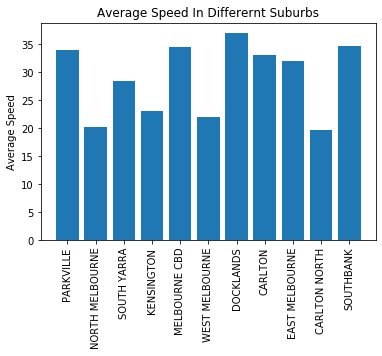

In [13]:
# Data Visualisation

# get data characteristics through various types of visualisation

# Bar plot
%matplotlib inline
import matplotlib.pyplot as plt

#Detecting any duplicated suburb
unique_suburbs = pd.Series.unique(merged_traffic.suburb).tolist()


#Change upper case of data to remove duplication  
merged_traffic.suburb = merged_traffic.suburb.str.upper()

#creats the bar plot

y_pos = np.arange(len(unique_suburbs))

performance = merged_traffic.groupby(['suburb'] , sort= True)['average_speed'].mean()

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, unique_suburbs , rotation =90)
plt.ylabel('Average Speed')
plt.title('Average Speed In Differernt Suburbs')

plt.show()

# please run multiple times on this section

# ValueError: shape mismatch: objects cannot be broadcast to a single shape 
# this error could be fixed by runing second time.

In [1]:
#Box plot

%matplotlib inline
w=6
h=5
d=70
fig = plt.figure(figsize=(w, h), dpi=d)
plt.title('Box ploting with number of short vehicle' ,fontsize = 20)
plt.xlabel('Vehicle class 1' , fontsize = 14)
plt.ylabel('Number' , fontsize = 14)
plt.boxplot(merged_traffic.vehicle_class_1)

# calculate the IQR
IQR = merged_traffic.vehicle_class_1.quantile(0.75) - merged_traffic.vehicle_class_1.quantile(0.25)

#Q3 + 1.5 * IQR

print("The inner fence for boxpot is:" , merged_traffic.vehicle_class_1.quantile(0.75)+ 1.5*IQR) 


NameError: name 'plt' is not defined

### Observations
Around 50% of the entries fall within a range of 0 to 28 (with the median being 28) when it comes to the number of short vehicles. The other 50% of the entries have a number of short vehicles ranging from 28 up to a maximum of 257. Any entries that contain a number exceeding 257 are considered outliers. These outliers represent unusual events in the observations of short vehicle counts. It's worth noting that the majority of observations for the number of short vehicles are below the threshold of 257.


Variance explained by each PC [0.54417117 0.16250715]


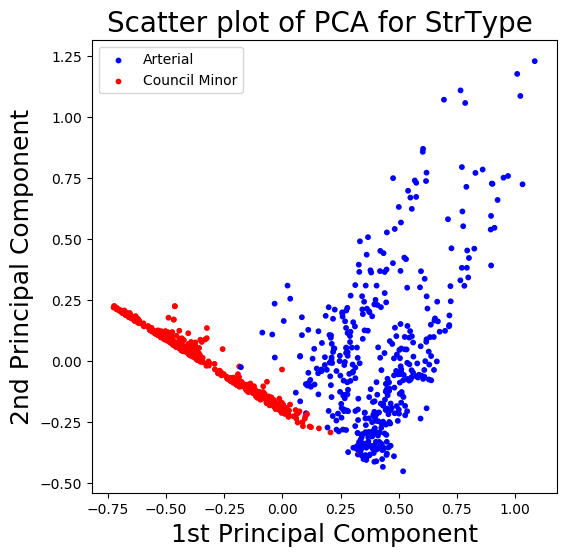

In [15]:
# Principal Component Analysis to determine the first and second principal com- ponents of this dataset
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA as sklearnPCA

# load traffic data
special_data = pd.read_csv('special_traffic.csv',encoding = 'ISO-8859-1')


# Randomly sample 1000 entries from Datframe and set random_state
special_traffic = special_data.sample(n=1000 , random_state=2)

#Normalization -- change the scale of features's values

min_max_scaler = MinMaxScaler()

# remove the atrtibutes of idx and Strtype
spe_traffic_infor = special_traffic.drop(['idx', 'StrType'], axis = 1 )

spe_traffic_infor_minmax = min_max_scaler.fit_transform(spe_traffic_infor)


sklearn_pca = sklearnPCA(n_components=2)   #we want just the first two PCs

traffic_sklearn = sklearn_pca.fit_transform(spe_traffic_infor_minmax)

print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_)   #print out the amount of variance explained by each PC


#set up the colour scheme
palette = ['blue','red']

colors = special_traffic.StrType.replace(to_replace=special_traffic.StrType.unique(),value=palette).tolist()



#plot the objects along the first two principal components, using the colour scheme
plt.figure(figsize=(6, 6), dpi=100)
plt.title('Scatter plot of PCA for StrType ', fontsize=20)
legend_str =  'Arterial'
legend_str2 = 'Council Minor'

legend_combine = ['Arterial','Council Minor']


plt.scatter(traffic_sklearn[:,0],traffic_sklearn[:,1],s=10,c=colors)

# using the empty scatters parameter label twice to put label on the legend
# since one scatter only provide one label
# legend_combine list

plt.scatter([],[],s=10,c='b',label=legend_str)
plt.scatter([],[],s=10,c='r',label=legend_str2) 

#plot the PC's in 2D
plt.xlabel('1st Principal Component', fontsize=18)
plt.ylabel('2nd Principal Component', fontsize=18)

plt.legend()

plt.show()
          

In [16]:
traffic_sklearn

array([[ 0.32049148,  0.05447577],
       [ 0.37298286,  0.20264899],
       [ 0.33069217,  0.36451912],
       ...,
       [ 0.79921833,  0.3416443 ],
       [-0.5483032 ,  0.11215534],
       [-0.42231071,  0.05723356]])

### Interpret the scatter plot.

From the scatter plot, we can observe that after reducing the dimensionality of the features, two distinct clusters emerge on the graph, and these clusters are primarily based on the 'StrType' variable.

Considering both PC1 and PC2 as the reduced features, these two components effectively differentiate between the two categories in the data: 'Arterial' and 'Council minor'.


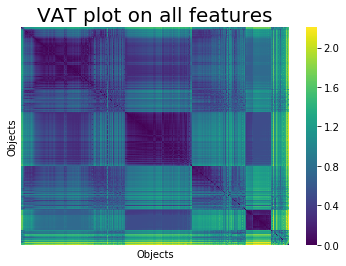

In [671]:
# VAT visual analyses
import seaborn as sns

# VAT plot on all features (excluding the idx and StrType)

RV, C, I = VAT(spe_traffic_infor_minmax)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set_title('VAT plot on all features', fontsize=20)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()




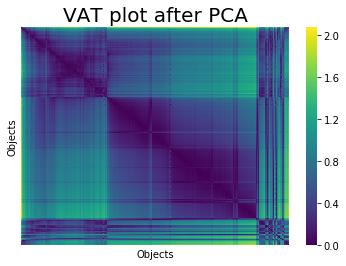

In [675]:
 # VAT plot on Principle Components

RV, C, I = VAT(traffic_sklearn)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set_title('VAT plot after PCA' , fontsize=20)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()
 

### Comparison of Two VAT Plots
To gain insight into the number of clusters present, the main concept behind VAT is crucial.

PCA (Principal Component Analysis) plays a role in removing less important features from the datasets, making the heatmap applied to PCA-transformed data reveal clearer patterns than the heatmap applied to the original dataset. This clarity in pattern recognition guides the choice of the number of clusters more effectively. PCA may suggest either 2 or 3 clusters as suitable choices.

In contrast, the original dataset, which encompasses all features, suggests the presence of 3 or more clusters.

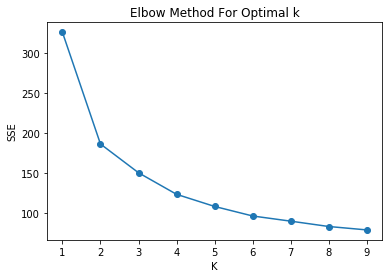

In [676]:
# Perform K-means clustering
%matplotlib inline
from sklearn.cluster import KMeans


sse = []

K = range(1,10)
for k in K:
    kmean_m = KMeans(n_clusters=k)
    
    # apply the data after scalling from Min_max. 
    kmean_m = kmean_m.fit(spe_traffic_infor_minmax)
    sse.append(kmean_m.inertia_)

plt.plot(K, sse, '-o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()



### Observation
VAT and K-means consistently suggest the number of clusters.

Indeed, VAT, when applied after PCA reduction, reveals the presence of approximately two clusters on the heatmap. This finding aligns with the results obtained through the elbow criterion method. Selecting k = 2 for K-means clustering is a reasonable choice since it corresponds to the elbow point on the graph.

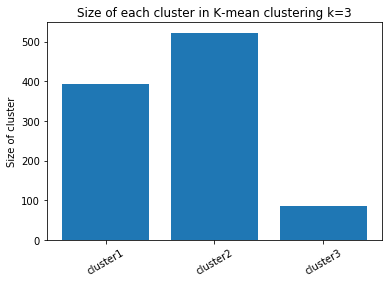

In [677]:
#Q3.3.b
from sklearn.cluster import KMeans
import numpy
%matplotlib inline

kmean = KMeans(n_clusters=3, random_state=1)
kmean_3 = kmean.fit_predict(spe_traffic_infor_minmax)

#Cluster size
kmean_lables = kmean.labels_

unique, counts = numpy.unique(kmean_lables, return_counts=True)


lables =['cluster1', 'cluster2', 'cluster3']
gnp = clusters
plt.bar(np.arange(len(gnp)),gnp)
plt.xticks(np.arange(len(counts)),lables, rotation=30)
plt.title('Size of each cluster in K-mean clustering k=3')
plt.ylabel('Size of cluster')
plt.show()


### Silhouette plotting can be a valuable tool for evaluating the K-means model using a different measurement approach.

The elbow criterion method determines the optimal number of clusters (k) by analyzing the SSE (Sum of Squared Errors) values, specifically looking for the point at which the distance between each point and its centroid starts to increase significantly after k = x.

In contrast, silhouette analysis is used to assess the degree of separation between clusters. The resulting values fall within the interval [-1, 1]. When plotting the silhouette values, clusters that approach a value of 1 indicate that they are well-separated from their neighbors. This analysis provides a distinct perspective for optimizing K-means clustering.

These two methods, while distinct, both offer valuable insights into the selection of the optimal number of clusters.



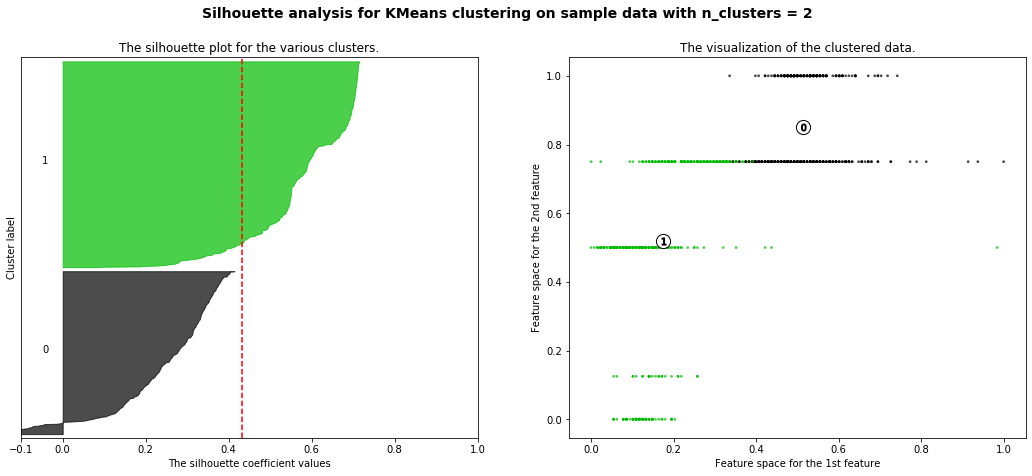

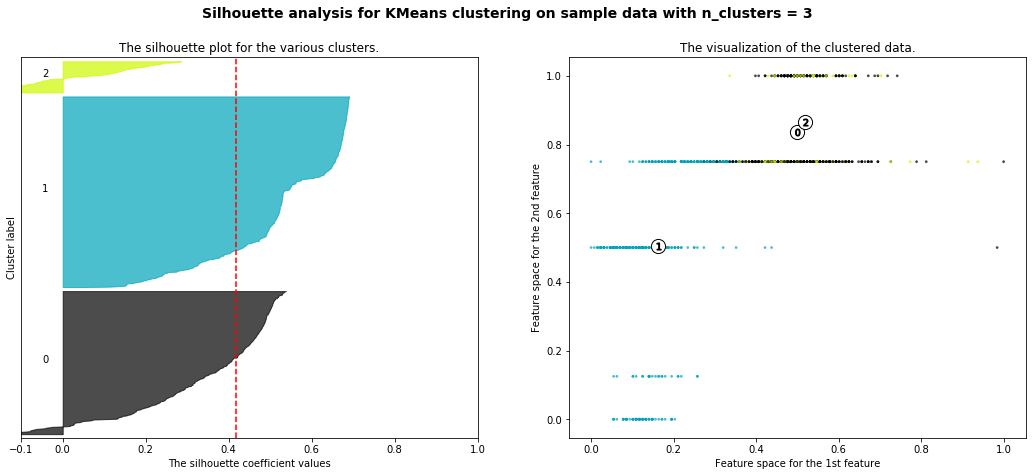

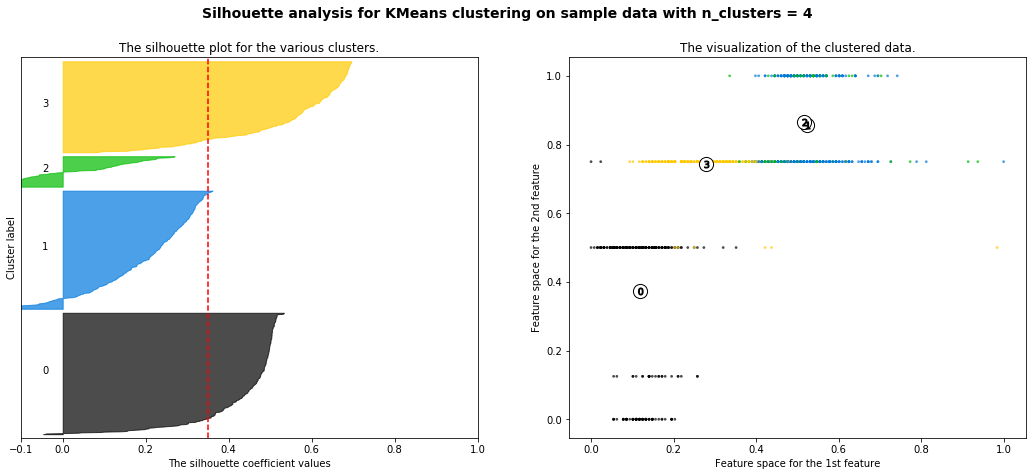

In [678]:
###  average silhoette score plotting
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline

K = range(2,5)

for k in K:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(spe_traffic_infor_minmax) + (k + 1) * 10])
    
    
    kmean_s = KMeans(n_clusters=k, random_state=1)

    kmean_s_fit = kmean_s.fit_predict(spe_traffic_infor_minmax)

    silhouette_avg = silhouette_score(spe_traffic_infor_minmax, kmean_s_fit)

    sample_silhouette_values = silhouette_samples(spe_traffic_infor_minmax, kmean_s_fit)

    y_lower = 10

    
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmean_s_fit == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

     
        y_lower = y_upper + 10  # 10 for the 0 samples
        
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(kmean_s_fit.astype(float) / k)
    ax2.scatter(spe_traffic_infor_minmax[:, 0], spe_traffic_infor_minmax[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmean_s.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')




### Interpreting the Silhouette Plot

In the left-side graphs, we compare results for k = 2, k = 3, and k = 4. The average silhouette score for clusters falls within the range of [-1, 1]. When a cluster's silhouette score approaches 1, it signifies that the cluster is well-separated from its neighbors.

For k = 2, k = 3, and k = 4, For their largest cluster: k = 2(cluster 1), k = 3 (cluster 1) and k = 4(cluster 3), we observe that all have a similar and relatively high average silhouette score, approximately around 0.72. However, when we examine the smallest cluster's score in k = 2 (approx. < 0.42) compared to the smallest scores in k = 3 (cluster 2) and k = 4 (cluster 1), the k = 2(cluster 0) has a relatively better score. This suggests that the separation from neighboring clusters is more pronounced in k = 2 compared to the other two smallest clusters.

Overall, k = 2 appears to perform the best among the options of k = 2, k = 3, and k = 4. This visual analysis aligns with the results obtained from the elbow criterion method and the VAT heatmap discussed earlier, all of which point to k = 2 as the optimal choice. This method effectively groups data based on the 'StrType' attribute, which contains two distinct groups.

Please note that the right-side graphs represent discrete data after normalization, which results in line-like patterns rather than the usual appearance of the data points.
